# 課題5. ヒストグラムと階調変換
1. ソースコードを実行し，ソースコードを読んで何をしているかを確認しなさい．
2. プログラムを実行すると表示されるヒストグラムを参照して，プログラム内の(gazo[y][x] - 50 ) * 3の部分を変更し，以下のような濃淡がよりはっきりとした画像を生成しなさい．
3. !レポート!　作成したプログラムによってどのような処理が行われているのかを説明しなさい．また，その処理の中で使われている値や式を選択した理由を，ヒストグラムを使って分かりやすく説明しなさい．


変換前の画像とヒストグラム


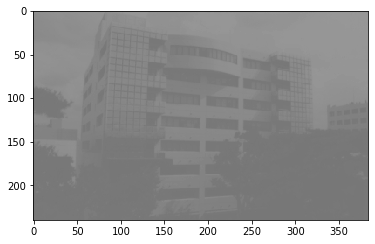

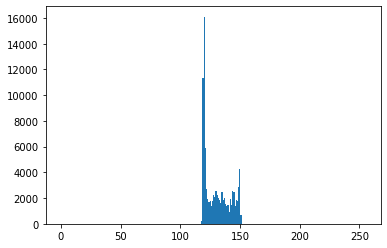

数値化された変換前の画像の最大値
152
数値化された変換前の画像の最小値
118
数値化された変換前の画像の調和平均値
129.6588620952714
変換後の画像とヒストグラム


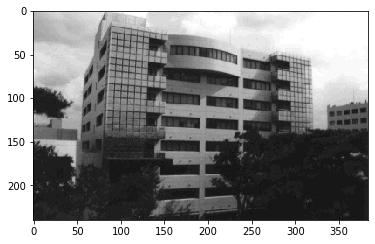

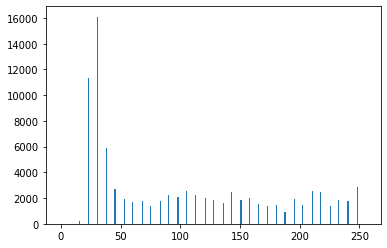

In [46]:
from pylab import *
from cv2 import imread
import statistics

# ローカルディレクトリにDLした画像を読み込み
gazo = imread( "kadai6.bmp", 0 )
statistics_list = []
residual_from_average = 0

# 画像を表示
print("変換前の画像とヒストグラム")
imshow(gazo, cmap="gray", vmin=0, vmax=255, interpolation="None")
show()

# ヒストグラムを表示
hist( gazo.flatten(), 256, (0,255) )
show()

# 統計値を導出する処理
for x in range(384):
    for y in range(240):
        statistics_list.append(gazo[y][x])


print( "数値化された変換前の画像の最大値" )
max_val = max(statistics_list)
print(max_val)

print( "数値化された変換前の画像の最小値" )
min_val = min(statistics_list)
print(min_val)

print( "数値化された変換前の画像の調和平均値" )
harmonic_mean = statistics.harmonic_mean(statistics_list)
print(harmonic_mean)

# 数値化された画像データの値域を変数化する
width = max_val - min_val
# 最大値を基準に重みを変数化する
weight = 255 - max_val



# 変換データを格納する配列を0埋めしてピクセル数を要素数として240列x384行で初期化する
gazo2 = zeros((240,384))
gazo3 = zeros((240,384))
gazo4 = zeros((240,384))

# 画像を変換
for x in range(384):
    for y in range(240):
        ######### ここを変更 ############
        # 変換前の画像データの値はグレースケールが取り得る値の中央付近に集中している為、不鮮明になっている.
        # 数値化された画像データの値を最小値0から最大値255までの値域へ分散させる.
        # 数値化された画像データの値から調和平均値を引いた値に最大値と値域の商を掛けて重みを加算する.
        gazo2[y][x] = ((gazo[y][x] - harmonic_mean) * (255 / width)) + weight
        #############################

# 画像を表示
print("変換後の画像とヒストグラム")
imshow(gazo2, cmap="gray", vmin=0, vmax=255, interpolation="None")
show()

# ヒストグラムを表示
hist( gazo2.flatten(), 256, (0,255) )
show()

# 作成したプログラムの処理
1. 画像データをグレイスケールで数値化する
2. 統計値を導出する
3. 変換データを格納する配列を0埋めしてピクセル数を要素数として240列x384行で初期化する
4. 数値化された画像データの値から調和平均値を引いた値に最大値と値域の商を掛けて重みを加算する.
5. 変換データを格納する配列をグレイスケールで描画する

# 処理の中で使われている値や式を選択した理由
変換前の画像データから生成したヒストグラムを見ると最大値と最小値の差は34となり、かつ値域はグレースケールが取り得る値の中央付近に集中している為、不鮮明になっている.
以上を踏まえ数値化された画像データの値を最小値0から最大値255までの値域へ均等に分散させる処理を行った.